https://morvanzhou.github.io/tutorials/machine-learning/torch/4-04-autoencoder/

# 要点

神经网络也能进行非监督学习，只需要训练数据，不需要标签数据。自编码就是这样一种形式。自编码能自动分类数据，而且也能嵌入在便监督学习的上面，用少量的有标签样本和大量的无标签样本学习。

# 训练数据

自编码只用训练集就好了，而且只需要训练 training data 的 image，不用训练 labels.

In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

#超参数
EPOCH=10
BATCH_SIZE=64
LR=0.005
DOWNLOAD_MNIST=False
N_TEST_IMG=5  #到时候显示 5张图片看效果

#Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST,
)

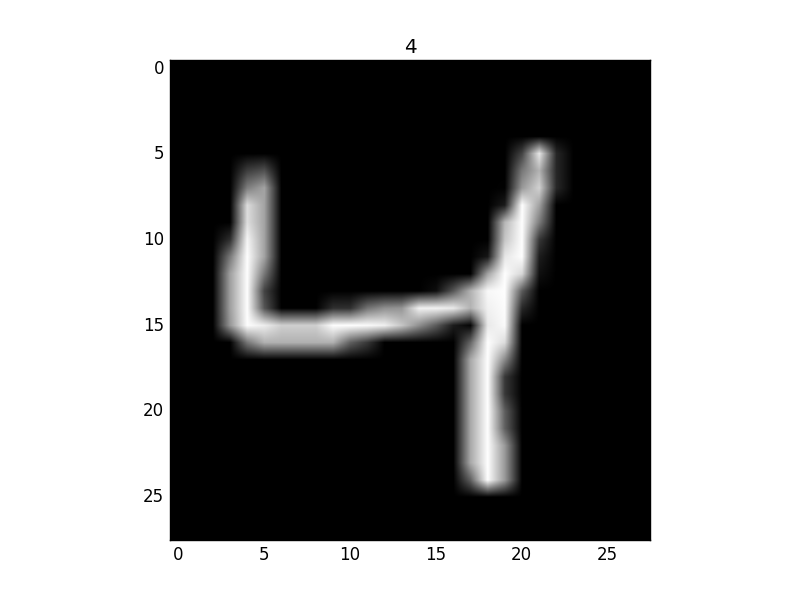

这就是我们要训练的手写数字4.

# AutoEncode

AutoEncode形式很简单，分别是`encoder`和`decoder`，压缩和解压，压缩后得到压缩的特征值，再从压缩的特征值解压成原图片。

In [2]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        
        #压缩
        self.encoder=nn.Sequential(
            nn.Linear(28*28,128),
            nn.Tanh(),
            nn.Linear(128,64),
            nn.Tanh(),
            nn.Linear(64,12),
            nn.Tanh(),
            nn.Linear(12,3),   #压缩成3个特征，进行3D图像可视化
        )
        
        # 解压
        self.decoder=nn.Sequential(
            nn.Linear(3,12),
            nn.Tanh(),
            nn.Linear(12,64),
            nn.Tanh(),
            nn.Linear(64,128),
            nn.Tanh(),
            nn.Linear(128,28*28),
            nn.Sigmoid(),  #激励函数让输出值在（0，1）
        )
        
    def forward(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return encoded,decoded
        
autoencoder=AutoEncoder()

# 训练

训练，并可视化训练的过程。我们可以有效的利用`encoder`和`decoder`来做很多事，比如这里我们用`decoder`的信息输出看和图片的对比，还能用`encoder`来看经过压缩后，神经网络对原图片的理解。`encoder`能将不同图片数据大概的分离开来。这就是一个无监督学习的过程。

In [3]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

optimizer=torch.optim.Adam(autoencoder.parameters(),lr=LR)
loss_func=nn.MSELoss()

for epoch in range(EPOCH):
    for step, (x, b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = x.view(-1, 28*28)   # batch y, shape (batch, 28*28)
        
        encoded, decoded = autoencoder(b_x)
        
        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

# 3D画图

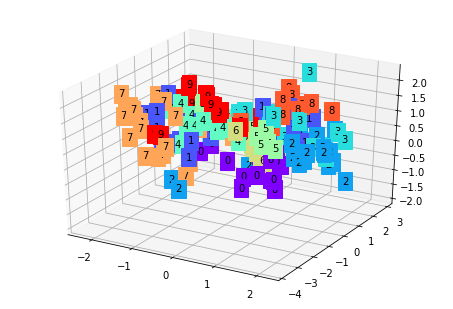

In [5]:
#要观看的数据
view_data=train_data.train_data[:200].view(-1,28*28).type(torch.FloatTensor)/255
encoded_data,_=autoencoder(view_data)  #提取压缩的特征值
fig=plt.figure(2)
ax=Axes3D(fig)  #3D图
# x,y,z的数据值
X=encoded_data.data[:,0].numpy()
Y=encoded_data.data[:,1].numpy()
Z=encoded_data.data[:,2].numpy()
values=train_data.train_labels[:200].numpy()  #标签值
for x,y,z,s in zip(X,Y,Z,values):
    c=cm.rainbow(int(255*s/9))  #上色
    ax.text(x, y, z, s, backgroundcolor=c)    #标位子
ax.set_xlim(X.min(),X.max())
ax.set_ylim(Y.min(),Y.max())
ax.set_zlim(Z.min(),Z.max())
plt.show()

# 完整代码

torch.Size([60000, 28, 28])
torch.Size([60000])


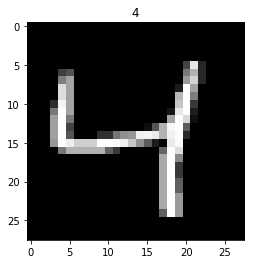

Epoch:  0 | train loss: 0.2315


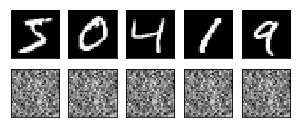

Epoch:  0 | train loss: 0.0735


Epoch:  0 | train loss: 0.0626


Epoch:  0 | train loss: 0.0615


Epoch:  0 | train loss: 0.0561


Epoch:  0 | train loss: 0.0512


Epoch:  0 | train loss: 0.0493


Epoch:  0 | train loss: 0.0488


Epoch:  0 | train loss: 0.0448


Epoch:  0 | train loss: 0.0426


Epoch:  1 | train loss: 0.0471


Epoch:  1 | train loss: 0.0473


Epoch:  1 | train loss: 0.0420


Epoch:  1 | train loss: 0.0460


Epoch:  1 | train loss: 0.0403


Epoch:  1 | train loss: 0.0394


Epoch:  1 | train loss: 0.0395


Epoch:  1 | train loss: 0.0427


Epoch:  1 | train loss: 0.0408


Epoch:  1 | train loss: 0.0432


Epoch:  2 | train loss: 0.0429


Epoch:  2 | train loss: 0.0390


Epoch:  2 | train loss: 0.0389


Epoch:  2 | train loss: 0.0402


Epoch:  2 | train loss: 0.0393


Epoch:  2 | train loss: 0.0411


Epoch:  2 | train loss: 0.0386


Epoch:  2 | train loss: 0.0398


Epoch:  2 | train loss: 0.0385


Epoch:  2 | train loss: 0.0331


Epoch:  3 | train loss: 0.0405


Epoch:  3 | train loss: 0.0364


Epoch:  3 | train loss: 0.0390


Epoch:  3 | train loss: 0.0386


Epoch:  3 | train loss: 0.0378


Epoch:  3 | train loss: 0.0370


Epoch:  3 | train loss: 0.0371


Epoch:  3 | train loss: 0.0394


Epoch:  3 | train loss: 0.0398


Epoch:  3 | train loss: 0.0367


Epoch:  4 | train loss: 0.0357


Epoch:  4 | train loss: 0.0402


Epoch:  4 | train loss: 0.0351


Epoch:  4 | train loss: 0.0373


Epoch:  4 | train loss: 0.0384


Epoch:  4 | train loss: 0.0358


Epoch:  4 | train loss: 0.0328


Epoch:  4 | train loss: 0.0426


Epoch:  4 | train loss: 0.0353


Epoch:  4 | train loss: 0.0396


Epoch:  5 | train loss: 0.0325


Epoch:  5 | train loss: 0.0350


Epoch:  5 | train loss: 0.0382


Epoch:  5 | train loss: 0.0350


Epoch:  5 | train loss: 0.0347


Epoch:  5 | train loss: 0.0359


Epoch:  5 | train loss: 0.0352


Epoch:  5 | train loss: 0.0369


Epoch:  5 | train loss: 0.0323


Epoch:  5 | train loss: 0.0369


Epoch:  6 | train loss: 0.0400


Epoch:  6 | train loss: 0.0332


Epoch:  6 | train loss: 0.0357


Epoch:  6 | train loss: 0.0334


Epoch:  6 | train loss: 0.0365


Epoch:  6 | train loss: 0.0345


Epoch:  6 | train loss: 0.0349


Epoch:  6 | train loss: 0.0341


Epoch:  6 | train loss: 0.0327


Epoch:  6 | train loss: 0.0359


Epoch:  7 | train loss: 0.0342


Epoch:  7 | train loss: 0.0383


Epoch:  7 | train loss: 0.0311


Epoch:  7 | train loss: 0.0339


Epoch:  7 | train loss: 0.0352


Epoch:  7 | train loss: 0.0307


Epoch:  7 | train loss: 0.0381


Epoch:  7 | train loss: 0.0380


Epoch:  7 | train loss: 0.0350


Epoch:  7 | train loss: 0.0341


Epoch:  8 | train loss: 0.0353


Epoch:  8 | train loss: 0.0342


Epoch:  8 | train loss: 0.0368


Epoch:  8 | train loss: 0.0356


Epoch:  8 | train loss: 0.0309


Epoch:  8 | train loss: 0.0369


Epoch:  8 | train loss: 0.0383


Epoch:  8 | train loss: 0.0332


Epoch:  8 | train loss: 0.0343


Epoch:  8 | train loss: 0.0314


Epoch:  9 | train loss: 0.0345


Epoch:  9 | train loss: 0.0397


Epoch:  9 | train loss: 0.0369


Epoch:  9 | train loss: 0.0356


Epoch:  9 | train loss: 0.0370


Epoch:  9 | train loss: 0.0347


Epoch:  9 | train loss: 0.0323


Epoch:  9 | train loss: 0.0327


Epoch:  9 | train loss: 0.0371


Epoch:  9 | train loss: 0.0336


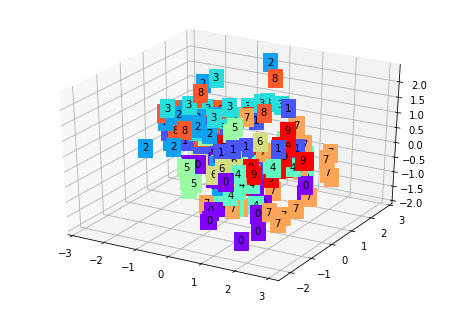

In [6]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.4
matplotlib
numpy
"""
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np


# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = False
N_TEST_IMG = 5

# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)

# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


autoencoder = AutoEncoder()

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot

# original data (first row) for viewing
view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())

for epoch in range(EPOCH):
    for step, (x, b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = x.view(-1, 28*28)   # batch y, shape (batch, 28*28)

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()

# visualize in 3D plot
view_data = train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()